In [1]:
 pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing all the necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra
import matplotlib.pyplot as plt # visualization lib
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn - ML
from sklearn.preprocessing import StandardScaler # scaling

In [3]:
# Load the csv (Dataset) files
location1 = pd.read_csv('Location1.csv')
location2 = pd.read_csv('Location2.csv')
location3 = pd.read_csv('Location3.csv')
location4 = pd.read_csv('Location4.csv')

In [4]:
# See the location 1 
location1.head() # show you top 5 rows

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047
1,2017-01-02 01:00:00,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516
2,2017-01-02 02:00:00,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985
3,2017-01-02 03:00:00,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454
4,2017-01-02 04:00:00,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922


In [5]:
# Add a new column to identify the location
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

# Concatenate to a dataframe
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047,Location1
1,2017-01-02 01:00:00,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516,Location1
2,2017-01-02 02:00:00,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985,Location1
3,2017-01-02 03:00:00,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454,Location1
4,2017-01-02 04:00:00,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922,Location1


In [6]:
# Ssave the merged dataset to a new CSV file
merged_data.to_csv('merged_locations.csv', index=False)

In [7]:
# To see the basic information about the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [8]:
# To check the statistics of Dataset
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [9]:
# Check the missing values
merged_data.isnull().sum()


Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [10]:
# To check the duplicated rows
merged_data.duplicated().sum()

np.int64(0)

In [11]:
# Encode the categorical variables
merged_data = pd.get_dummies(merged_data, columns=['Location'], drop_first=True, dtype=int)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047,0,0,0
1,2017-01-02 01:00:00,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516,0,0,0
2,2017-01-02 02:00:00,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985,0,0,0
3,2017-01-02 03:00:00,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454,0,0,0
4,2017-01-02 04:00:00,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922,0,0,0


In [12]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [13]:
# Let's remove time col
merged_data.drop('Time', axis=1, inplace=True)

In [14]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047,0,0,0
1,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516,0,0,0
2,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985,0,0,0
3,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454,0,0,0
4,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922,0,0,0


### Week 2:EDA

In [15]:
# Let's extract the numerical columns
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Location_Location2', 'Location_Location3',
       'Location_Location4'],
      dtype='object')

In [16]:
merged_data.shape

(175200, 12)

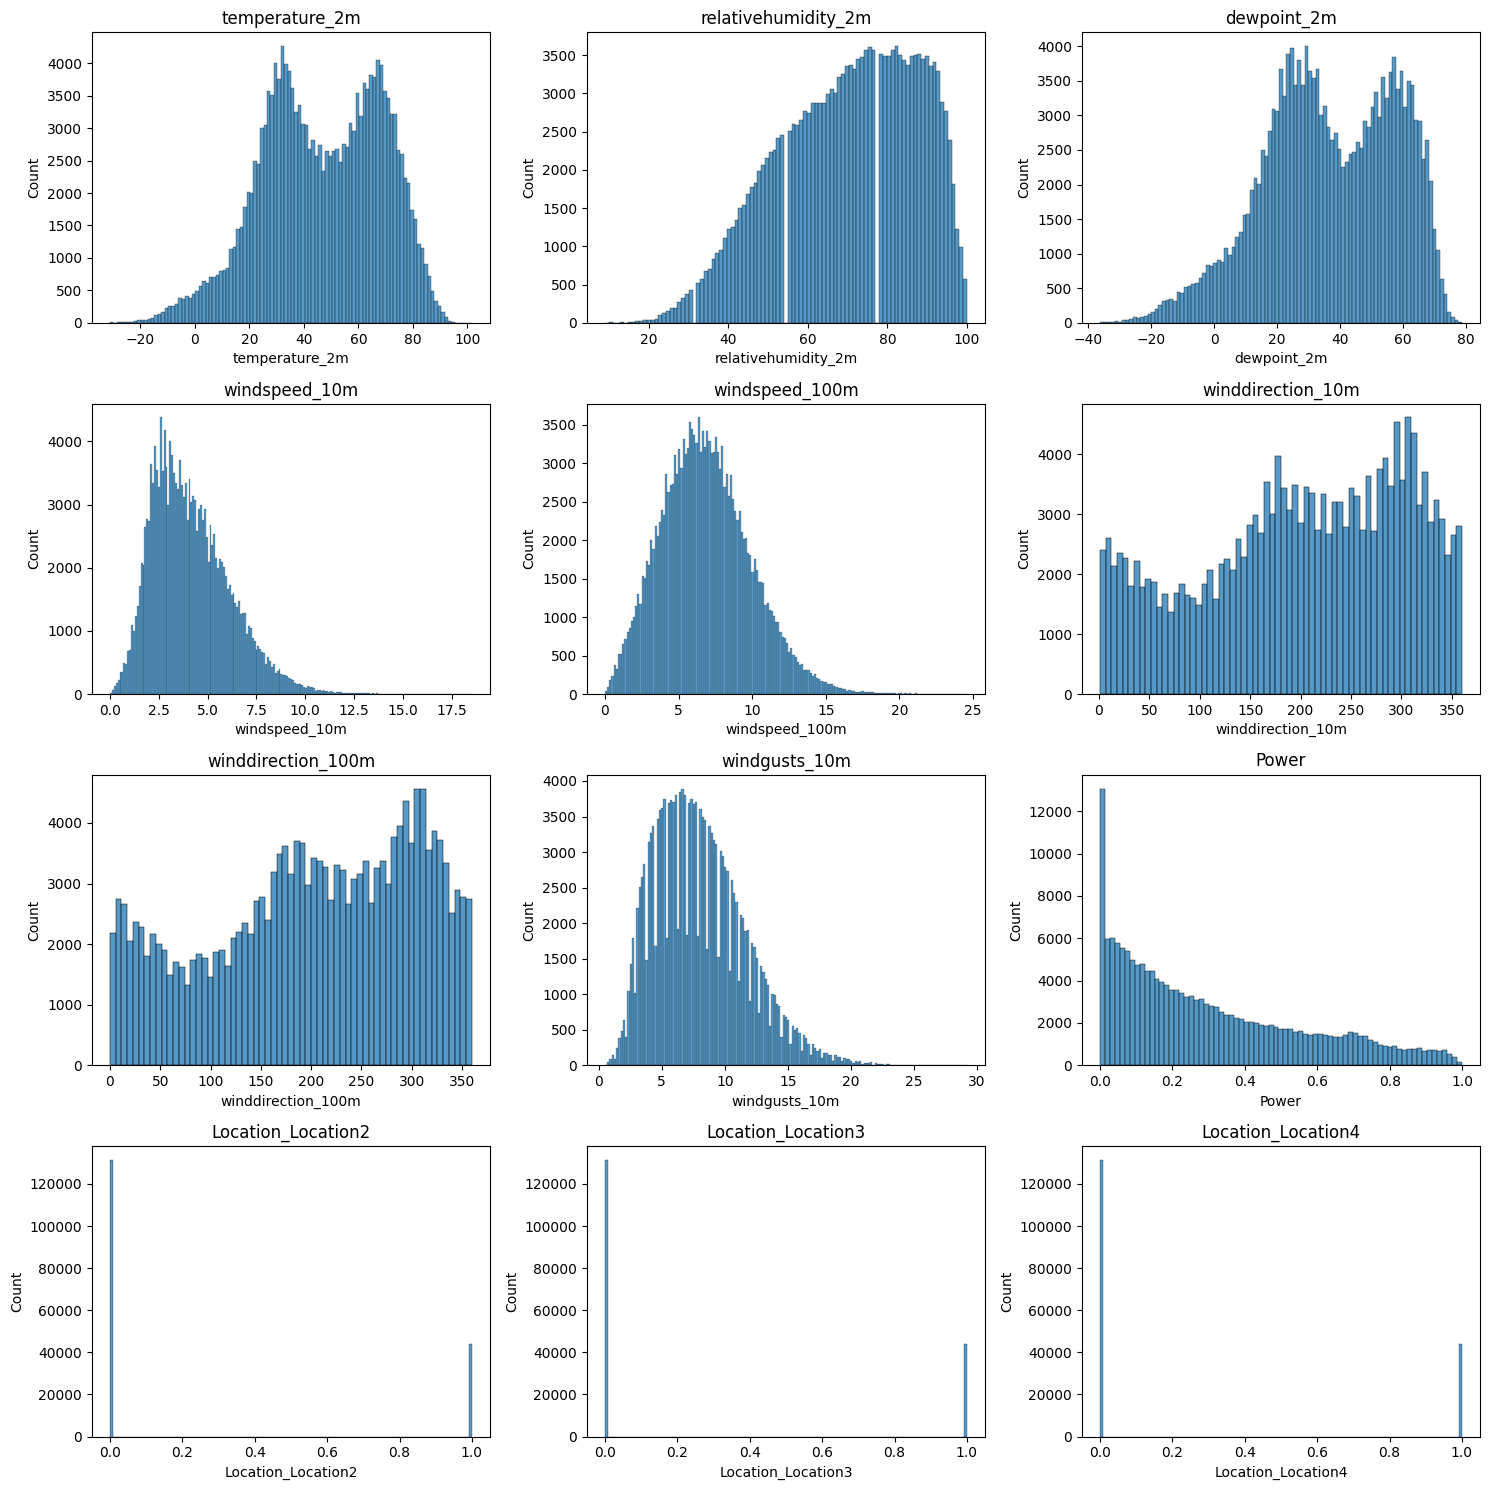

In [18]:
# let's plot using subplots for the data distribution of each numerical cols
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten() # we have 2d array and for that we need indices, rows/cols, so converting into 1d array
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

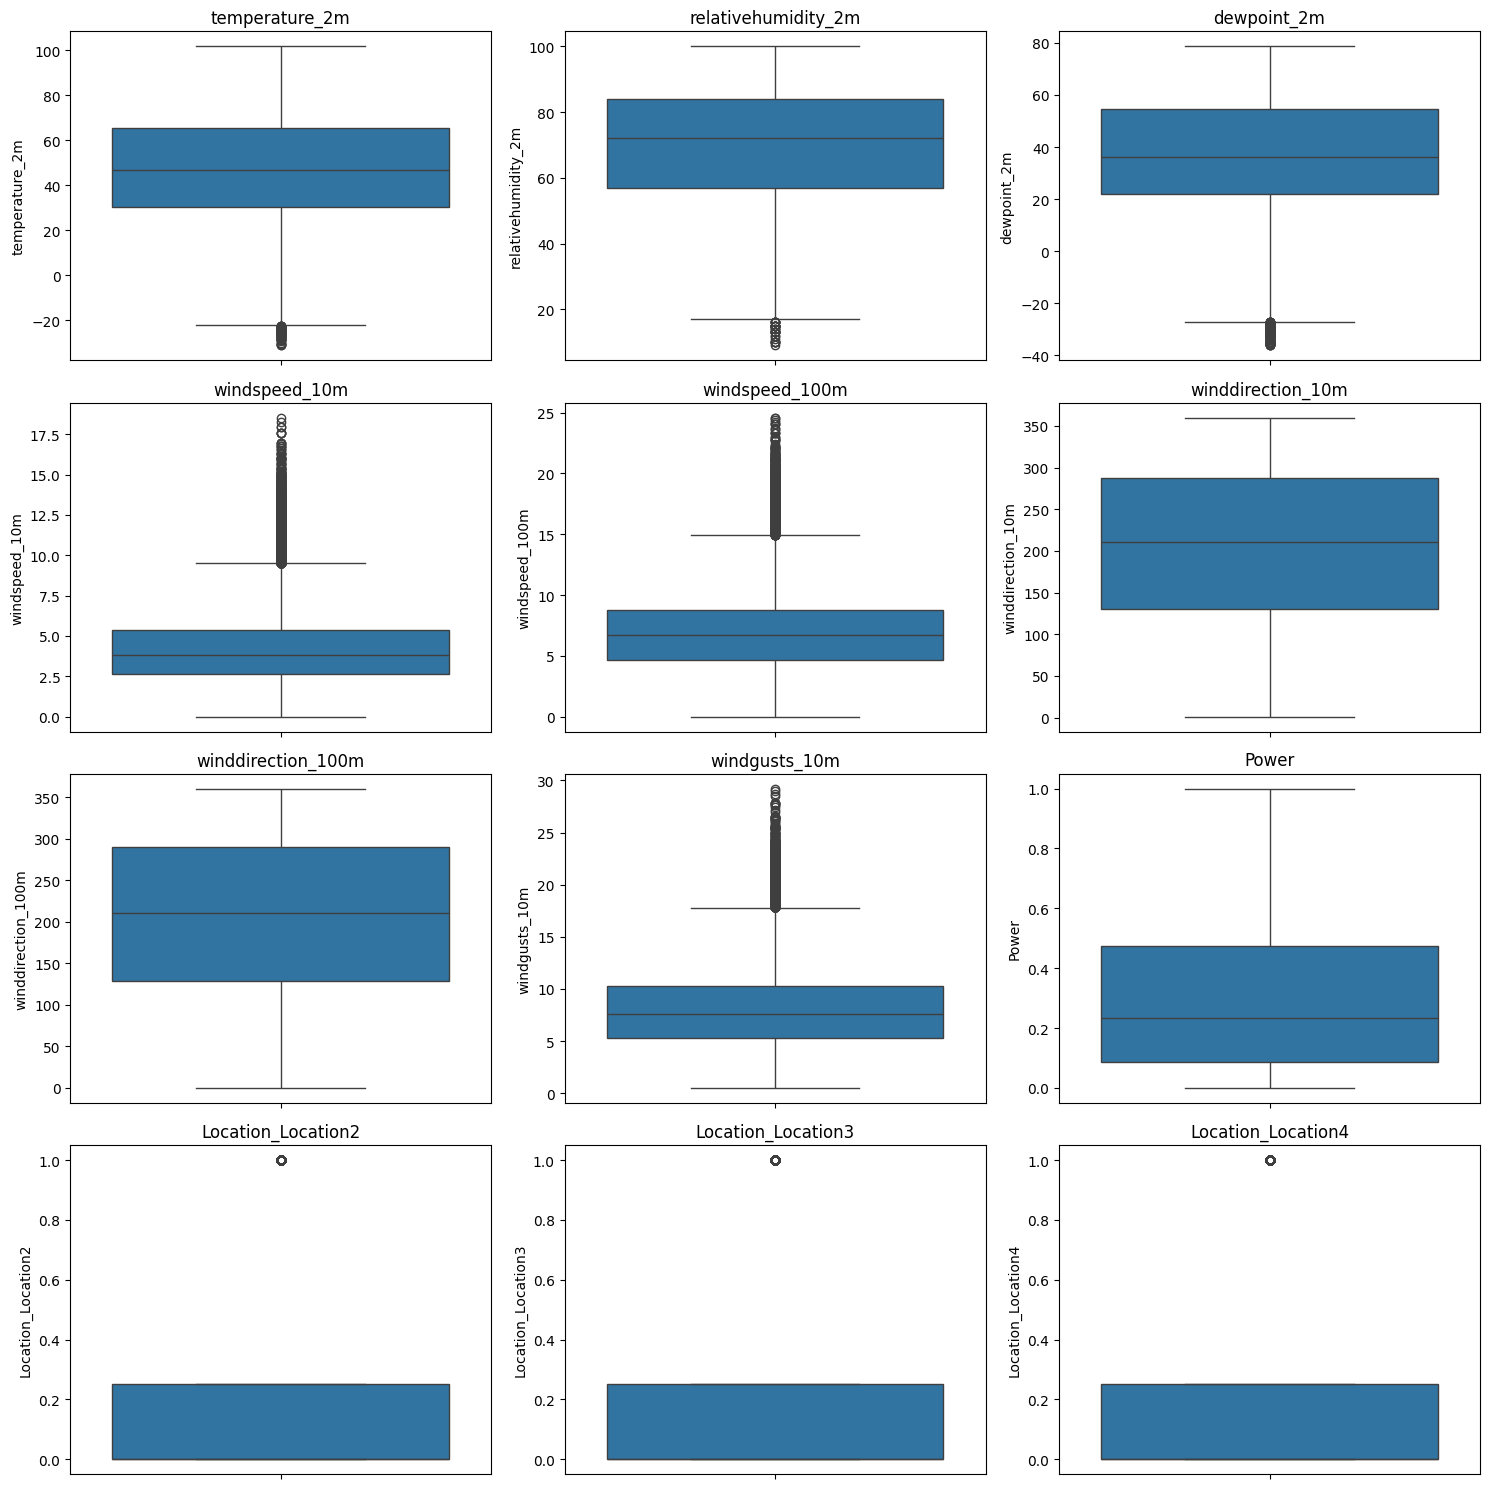

In [19]:
# Let's create box plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

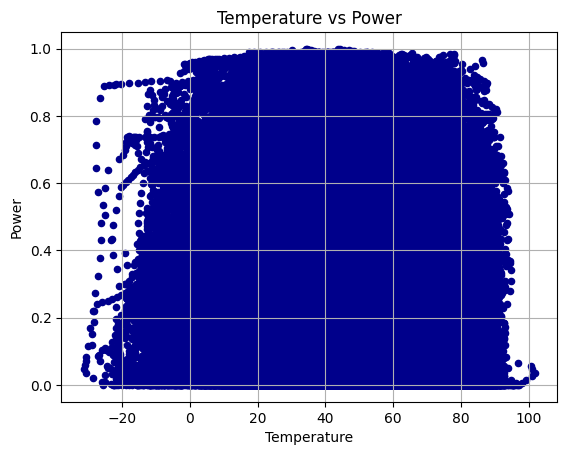

In [20]:
# let's use scatter plot to see the relationship between power & temp
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

In [ ]:
# Creating multiple plots to see the relation btw different cols and power
fig, axes = plt.subplots(3, 4, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

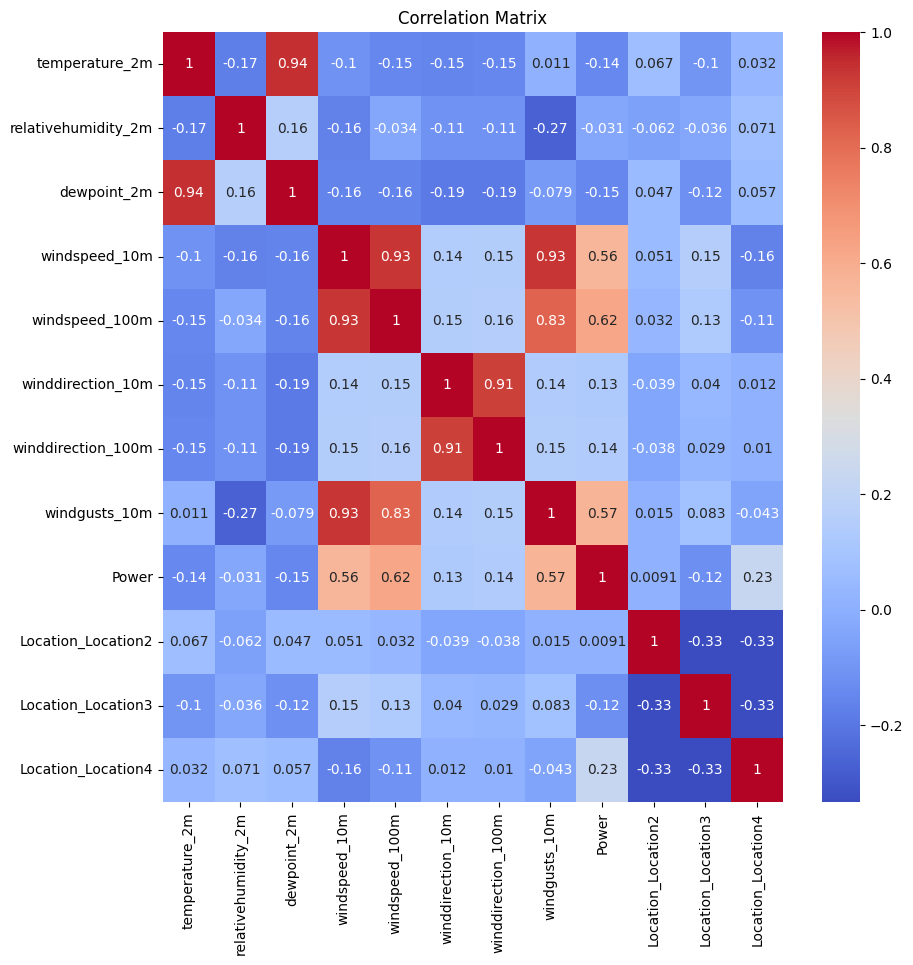

In [22]:
# Check the correlation between the cols and power
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()